# Task #3 - To Explore Unsupervised Machine Learning
## Problem:-
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

## Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

# Importing Libraries

In [76]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

# Importing the Data

In [77]:
# Here we are loading the dataset

iris=datasets.load_iris()
iris_table = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_table.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Details of Data

In [78]:
iris_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### Optimum number of cluster for K Means, Find the value of K ?

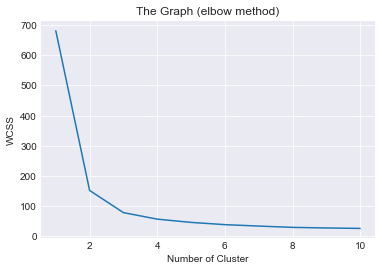

In [79]:
x= iris_table.iloc[:, [0, 1, 2, 3]].values
wcss = []
    
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Initializing the result into a graph form

plt.plot(range(1, 11), wcss)
plt.title('The Graph (elbow method)')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

##### The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters.

From this we choose the number of cluster as '3'.

In [80]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualizing features with scatter plot

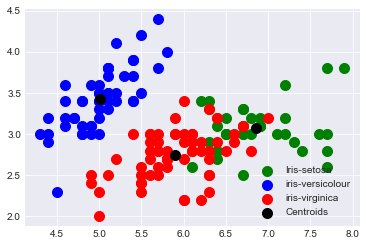

In [81]:
# Creat a scatter plot based on two coressponding features 

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s = 100, c='green', label ='Iris-setosa' )
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s = 100, c='blue', label ='iris-versicolour' )
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
           s = 100, c='red', label ='iris-virginica' )

# Centroid of cluster

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c='black', label ='Centroids' )


plt.legend()

# END